<a href="https://colab.research.google.com/github/MJMortensonWarwick/AI-DL/blob/main/5_1_long_short_term_memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long Short Term Memory (LSTM)
Ths tutorial runs LSTM on the [Reuters' news dataset](https://keras.io/api/datasets/reuters/#getwordindex-function). The dataset is all text and articles are in 46 classes/categories. 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

We'll load the data from Keras. We set the maximum length of each article to be 200 words (everything else is ignored) and the vocabulary size to be 4,000. This means we keep only the 4,00 most common words and all others are given the arbitrary token of 2 (see the dataset docs):

In [2]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(maxlen=200, num_words=4000)

2121728/2110848 [==============================] - 0s 0us/step


The data is already tokenised (see DSML materials if this is not clear). We have a JSON file from the library which allows us to translate tokens to the original text:

In [3]:
words = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


In [4]:
print(f'# of Training Samples: {len(X_train)}')
print(f'# of Test Samples: {len(X_test)}')

# of Training Samples: 7076
# of Test Samples: 1770


In [5]:
index_to_word = {}
for key, value in words.items():
    index_to_word[value] = key
print(' '.join([index_to_word[x] for x in X_train[0]]))
print(Y_train[0])

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 of oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs
3


Next we will employ padding. LSTM will expect all the inputs to be the same size, so "pad_sequences()" to add zeros to the end of any article less than 200 words (max words earlier means no article can be greater than 200 words):

In [6]:
padding_type = 'post'

X_train = pad_sequences(X_train, padding=padding_type)
X_test = pad_sequences(X_test, padding=padding_type)

Test its worked on a random example:

In [7]:
X_train[5]

array([   1,   56,    2,  925,  149,    8,   16,   23,  931, 3875,   25,
        116,    5,  165,   15,   10,   67,   13,   12,   12,   11,    2,
        400,   81,   79,  457,  145,   22,  331,   28, 3026,  331,   61,
       3609, 2097,    2,   79,   64,   85, 1863,   84,   22,   44,    2,
       2275,   79,  296, 1384,  157,    2,    8,   16,   23, 3875,    4,
        116,    6,  837,    2,    6, 3834,   31,  248, 1032,    2,    4,
       1618,    5,   37,   38, 1639,   27,  358,   37,   38,    2,    9,
          6,    2,    4,  316,    9,  662,    5,    4,  765,    5,  291,
         58,   60, 2660, 1067,  136,    4,  384,  292,  270,  120,   17,
         12,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

now we can build our model. We'll start with an embedding layer (like Word2Vec, autoencoders, etc.) that will take us from a vocab of 4,000 (effectively the input shape) to an embedded (latent) space of size 256. We then have our LSTM layer - inside a bi-directional layer (remember this isn't pure feed-forward). After that its all as we've seen before ... 46 layers at the end represents the 46 classes.

In [8]:
from keras.layers import Embedding, Bidirectional, Activation, Dense, Dropout, LSTM

model = keras.models.Sequential()

In [9]:
# Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
model.add(Embedding(4000, 256))
model.add(Bidirectional(LSTM(256)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(46))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         1024000   
                                                                 
 bidirectional (Bidirectiona  (None, 512)              1050624   
 l)                                                              
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 46)                23598     
                                                                 
 activation_1 (Activation)   (None, 46)                0         
                                                        

Next, we compile run and evaluate our model:

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, verbose=2)

Epoch 1/10
222/222 - 32s - loss: 1.7287 - accuracy: 0.5800 - 32s/epoch - 146ms/step
Epoch 2/10
222/222 - 23s - loss: 1.2636 - accuracy: 0.6998 - 23s/epoch - 105ms/step
Epoch 3/10
222/222 - 23s - loss: 1.0310 - accuracy: 0.7494 - 23s/epoch - 106ms/step
Epoch 4/10
222/222 - 24s - loss: 0.8725 - accuracy: 0.7876 - 24s/epoch - 106ms/step
Epoch 5/10
222/222 - 23s - loss: 0.7182 - accuracy: 0.8265 - 23s/epoch - 105ms/step
Epoch 6/10
222/222 - 23s - loss: 0.6087 - accuracy: 0.8553 - 23s/epoch - 106ms/step
Epoch 7/10
222/222 - 23s - loss: 0.5205 - accuracy: 0.8806 - 23s/epoch - 106ms/step
Epoch 8/10
222/222 - 23s - loss: 0.4436 - accuracy: 0.8968 - 23s/epoch - 105ms/step
Epoch 9/10
222/222 - 23s - loss: 0.3964 - accuracy: 0.9052 - 23s/epoch - 105ms/step
Epoch 10/10
222/222 - 23s - loss: 0.3386 - accuracy: 0.9210 - 23s/epoch - 105ms/step


In [11]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=2)
print(f'\nTest accuracy: {test_accuracy}')

56/56 - 3s - loss: 0.9388 - accuracy: 0.8119 - 3s/epoch - 53ms/step

Test accuracy: 0.81186443567276


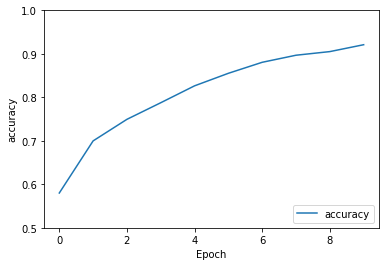

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Given there are 46 classes, 81% accuracy on test is a good start!